# Data Analysis

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path
pathtohere = Path()

In [5]:
def display_PDFs(xs:np.ndarray, data:np.ndarray, headings:tuple,colours:tuple,q2:float):
    """
    Display the PDFs.
    
    Inputs:
        - xs:np.ndarray: Momentum fractions the PDFs are evaluated at.
        - data:np.ndarray: 2D array of PDFs of each used quark at all x.
        - headings:tuple: Quark types used.
        - colours:tuple: Graph colours.
        - qs:float: Q^2 evaluated at.
    """
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    
    for i,heading in enumerate(headings):
        ax.plot(xs, data[:, i], label=heading,c=colours[i],marker='.')
        ax.grid()
    
    # Create appropiate labels.
    ax.set_xlabel('momentum fraction / x')
    ax.set_ylabel(r'PDF / $f_i(x)$')
    ax.set_title(r'$Q^2$ =' + str(q2))
    
    ax.legend(loc='best')
    ax.set_xscale('log')
    
    plt.show()
    
    
    
def display_fortran_c_error(data_c:np.ndarray, data_f:np.ndarray,
                            xs:np.ndarray,headings:tuple,colours:tuple,
                           q2:float):
    """
    Error of C translated code to Fortran (hopefully zero).
    
    Inputs:
        - data_c:np.ndarray: Data obtained from C++ code.
        - data_f:np.ndarray: Data obtained from Fortran code.
        - xs:np.ndarray: Momentum fraction evaluated at.
        - headings:tuple: Quark types used.
        - colours:tuple: Graph colours.
        - qs:float: Q^2 evaluated at.
    """
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    
    for i,heading in enumerate(headings):
        ax.plot(xs, data_c[:, i] - data_f[:,i], label=heading,c=colours[i],marker='.')
        ax.grid()
        
    ax.axhspan(-1e-6, 1e-6,
                    alpha=0.2, color='r')
    
    # Create appropiate labels.
    ax.set_xlabel('momentum fraction / x')
    ax.set_ylabel(r'PDF difference / $\Delta f_i(x)$')
    ax.set_title(r'$Q^2$ =' + str(q2))
    
    ax.legend(loc='best')
    ax.set_xscale('log')
    
    plt.show()

In [10]:
def main():
    # Get data from file.
    data_all = np.loadtxt(pathtohere / 'data/partonfrac.out', dtype=str)
    whereNan = np.where('-nan(ind)'==data_all)
    data_all[whereNan] = '0.'
    data_all = data_all.astype(float)
    
    # Split into different Q^2
    qs = np.asarray([1.,2.,12.,60.,200.,650.])
    numQ = int(qs.shape[0])
    numX = int(data_all.shape[0]/numQ)
    data = np.empty((numQ,numX,data_all.shape[1]),dtype=float)
    for i in range(numQ):
        data[i,:,:] = data_all[i*numX:(i+1)*numX]
    
    
    # Get Fortran data for error comparison (bug detection).
    data_all_f = np.loadtxt(pathtohere / 'data/partonfrac_f.out',dtype=str)
    whereNan = np.where('NaN'==data_all_f)
    data_all_f[whereNan] = '0.'
    data_all_f = data_all_f.astype(float)
    
    # Split into different Q^2
    data_f = np.empty((numQ,numX,data_all_f.shape[1]),dtype=float)
    for i in range(numQ):
        data_f[i,:,:] = data_all_f[i*numX:(i+1)*numX]
    
    
    headings = ('g', 'upv','dnv','sea', 'seam', 'splus','sminus')
    colours = ('g','r','y','orange','b','cyan','m')
    xs = data[0,:,0]
    
    data = data[:,:,1:]
    data_f = data_f[:,:,1:]
    
    for i in range(numQ):
        display_PDFs(xs,data[i],headings,colours,qs[i])
        # display_PDFs(xs,data_f[i],headings,colours,qs[i])
        
        # display_fortran_c_error(data[i],data_f[i],xs,headings,colours,qs[i])

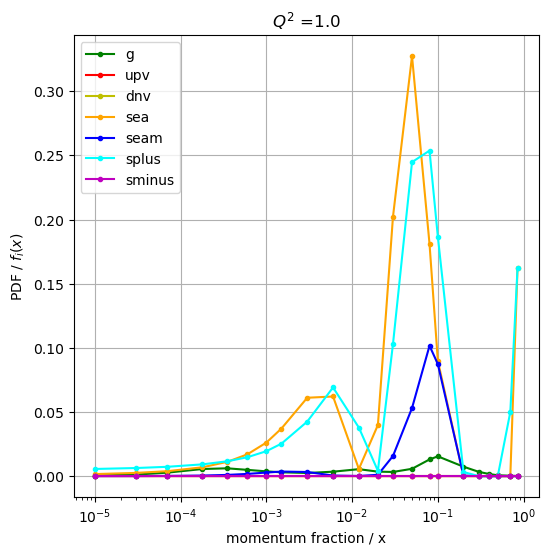

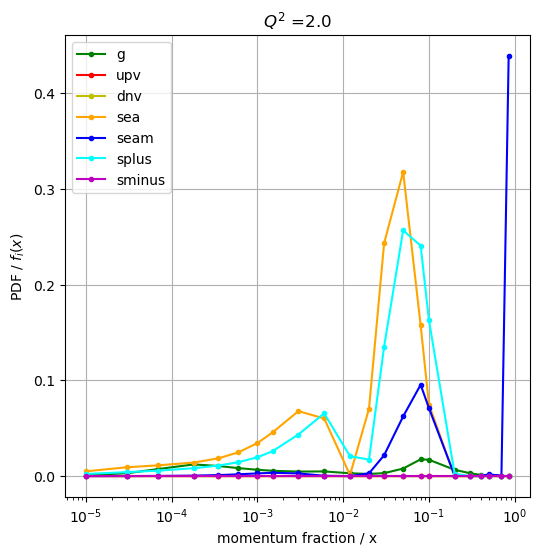

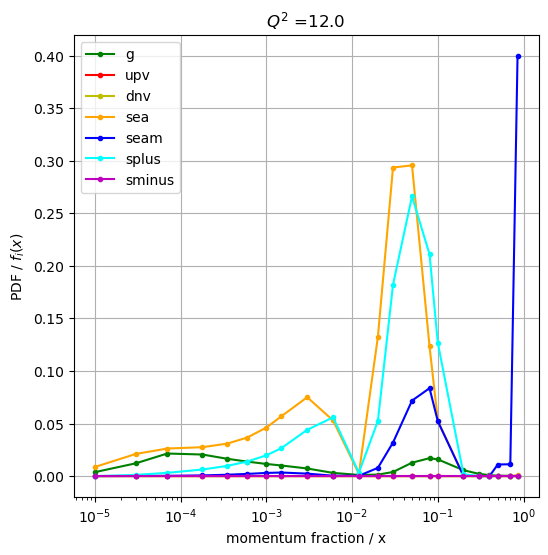

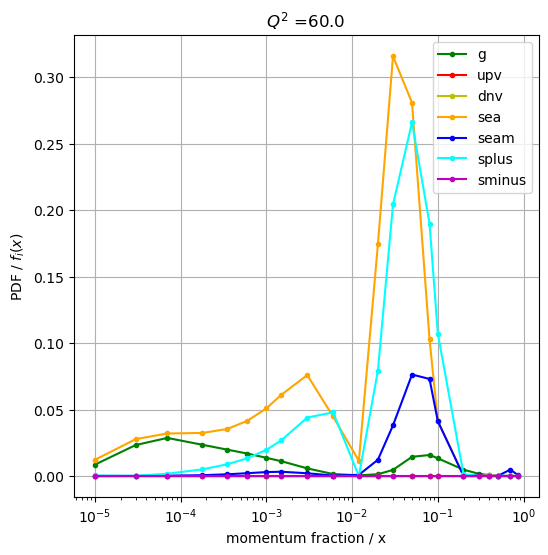

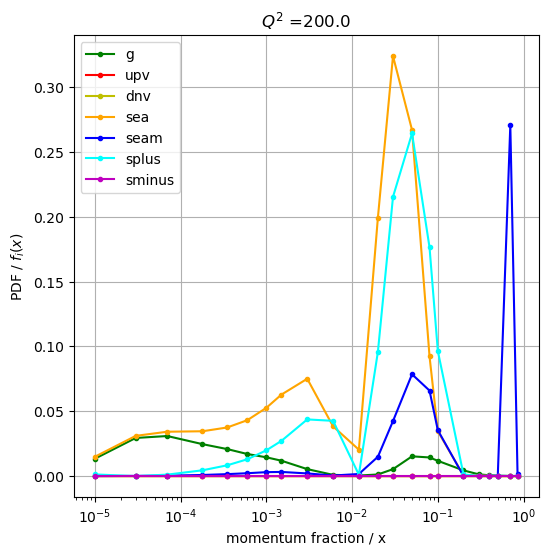

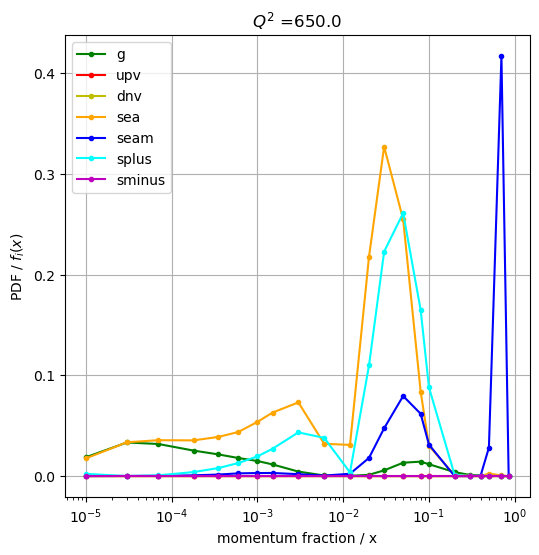

In [11]:
if __name__=='__main__':
    main()

Calculate rapidity dependence.

PDF at two x.

Product two x